In [1]:
!pip install -e ../.

Obtaining file:///home
ERROR: file:///home does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [2]:
import sys
sys.path.insert(0, '../')  


In [3]:
%pwd


'/home/mayank'

In [4]:
import cvaei
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from torch import nn, optim
from cvaei.examples.villar import Villar
from cvaei.models.conv_cvae import CNN_CVAE
import multiprocessing as mp


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
print(torch.cuda.is_available())
print(torch.version.cuda)



Using device: cuda
True
12.1


In [5]:
villar = Villar()
#mp.set_start_method('spawn')
train_theta_norm, train_data_norm, theta_normalizer, data_normalizer, val_theta_norm, val_data_norm = villar.prepare_data(10, scale = True)
observed_data = villar.observed_data()
#villar.check_normalizer()

Generating data...


In [ ]:
train_data_norm[3]

tensor([[0.0000e+00, 2.7000e-02, 9.4500e-02, 2.2750e-01, 3.8700e-01, 5.9550e-01,
         6.7150e-01, 3.1150e-01, 1.7850e-01, 1.2900e-01, 1.1500e-01, 1.1400e-01,
         1.1650e-01, 1.1150e-01, 1.0500e-01, 1.2700e-01, 1.2350e-01, 1.4350e-01,
         1.2900e-01, 1.3650e-01, 1.3250e-01, 1.3300e-01, 1.1850e-01, 1.7900e-01,
         1.7800e-01, 2.2600e-01, 3.1500e-01, 4.5800e-01, 6.2450e-01, 6.6550e-01,
         3.4050e-01, 2.4950e-01, 1.8450e-01, 1.3550e-01, 1.0300e-01, 1.2300e-01,
         1.6000e-01, 1.1350e-01, 1.2350e-01, 1.1350e-01, 1.1050e-01, 1.1200e-01,
         1.2550e-01, 1.5150e-01, 1.9900e-01, 2.3650e-01, 3.1650e-01, 4.2850e-01,
         5.9550e-01, 7.8950e-01, 4.7250e-01, 2.5500e-01, 1.4700e-01, 1.1050e-01,
         9.4000e-02, 1.3200e-01, 1.2000e-01, 1.7500e-01, 2.1800e-01, 1.3600e-01,
         1.3750e-01, 1.4000e-01, 1.1400e-01, 1.4450e-01, 1.3250e-01, 1.3550e-01,
         1.0800e-01, 1.0650e-01, 1.0650e-01, 1.0400e-01, 1.1200e-01, 1.6750e-01,
         2.6100e-01, 3.9150e

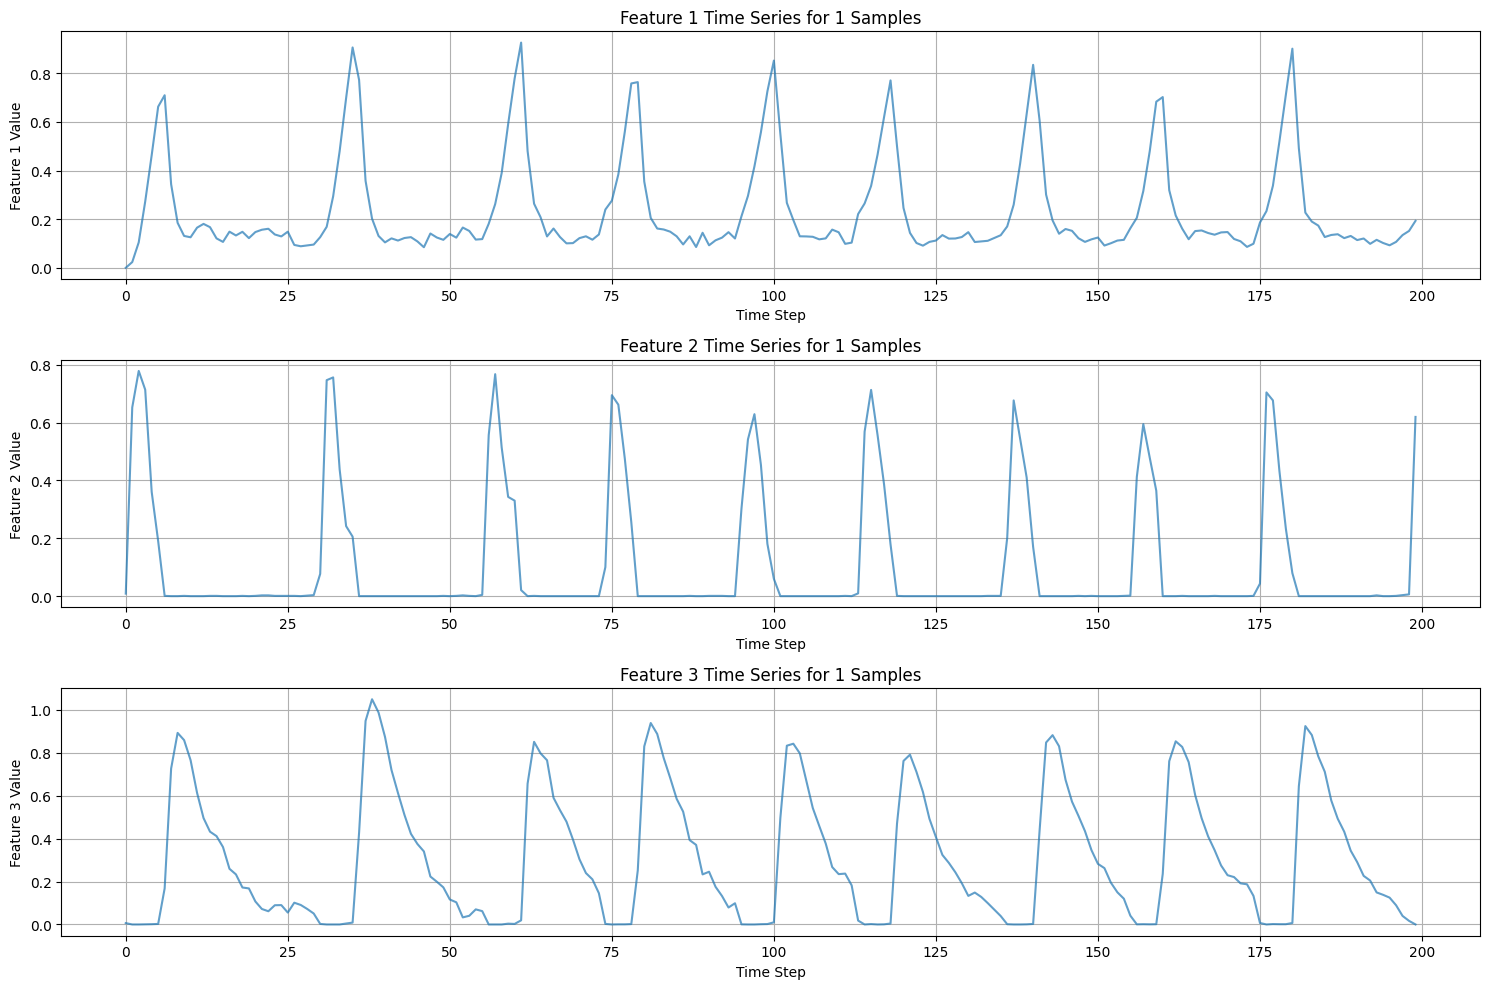

In [ ]:
villar.plot_observation(observed_data)

# Initialise the Model

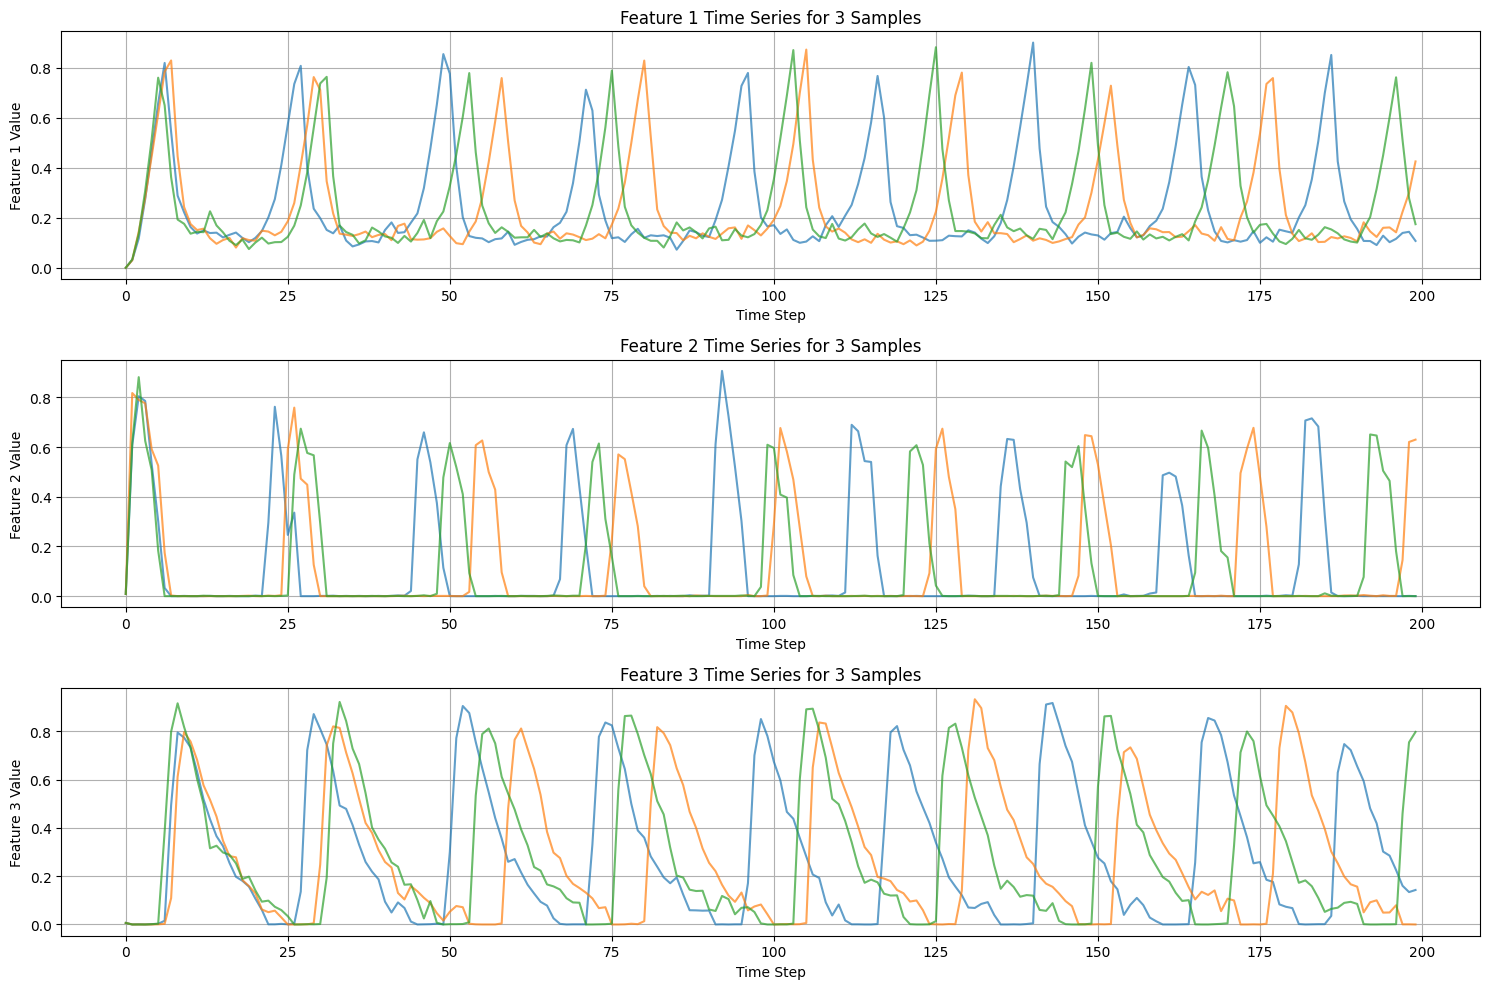

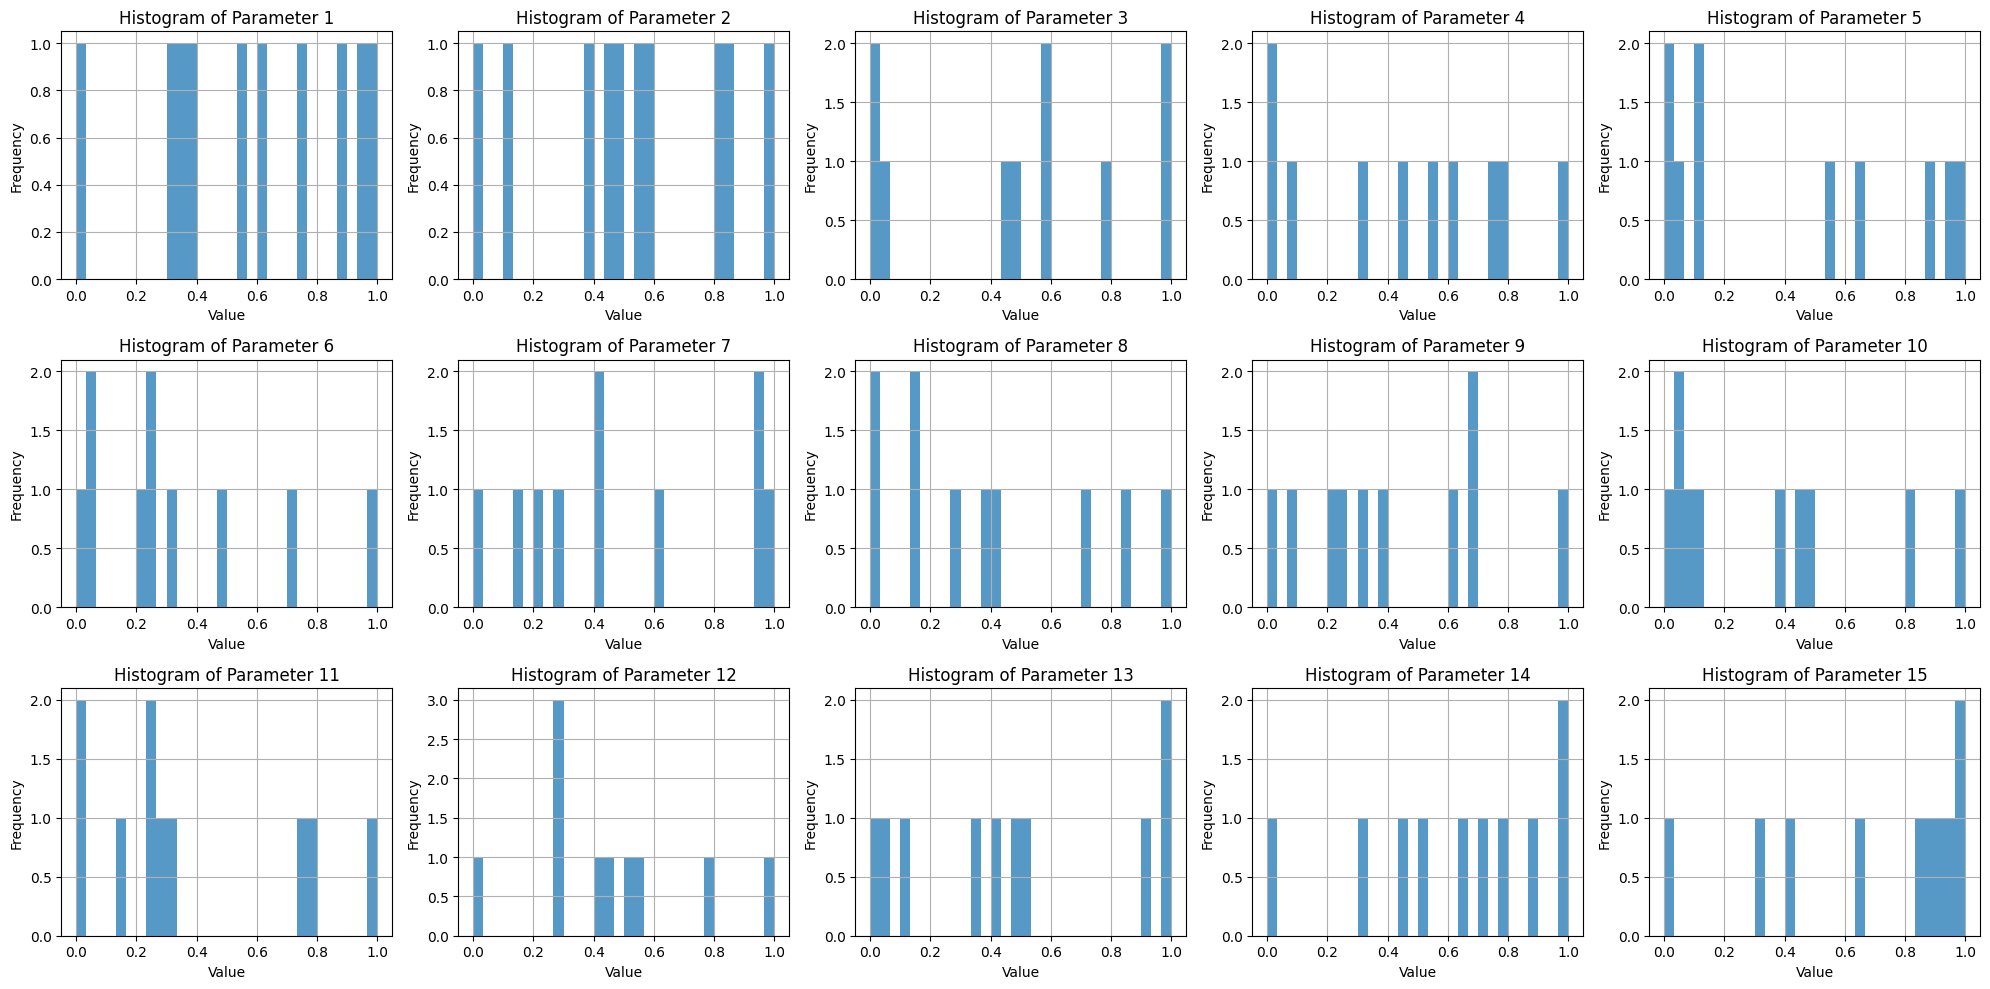

In [ ]:
villar.plot_observation(train_data_norm, num_samples =3)
villar.plot_prior(train_theta_norm)

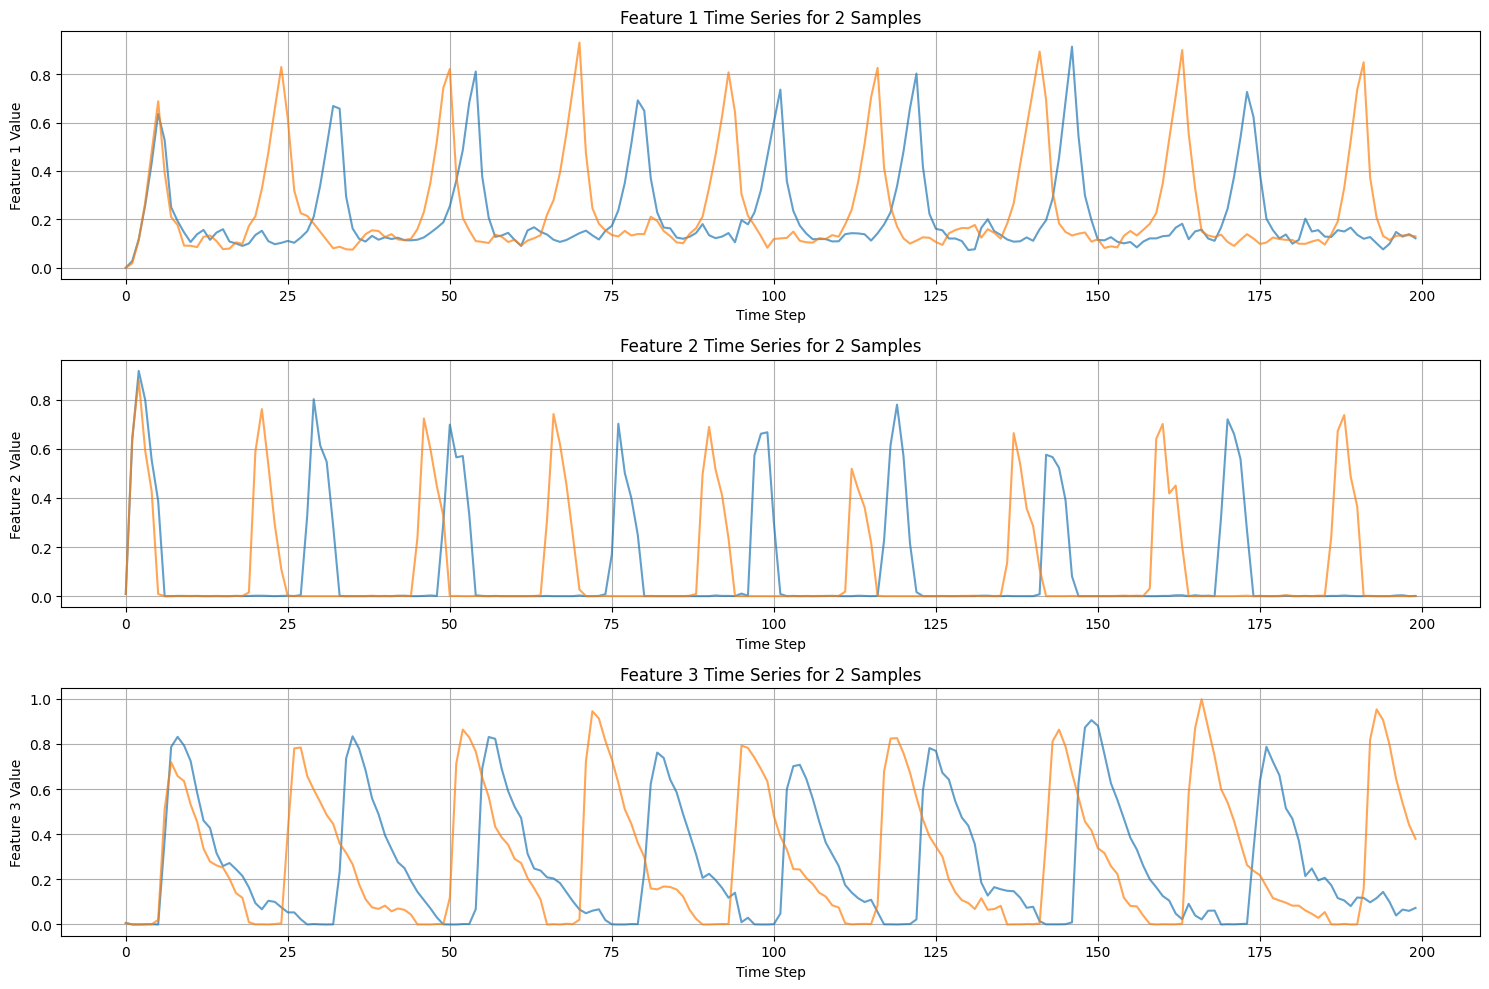

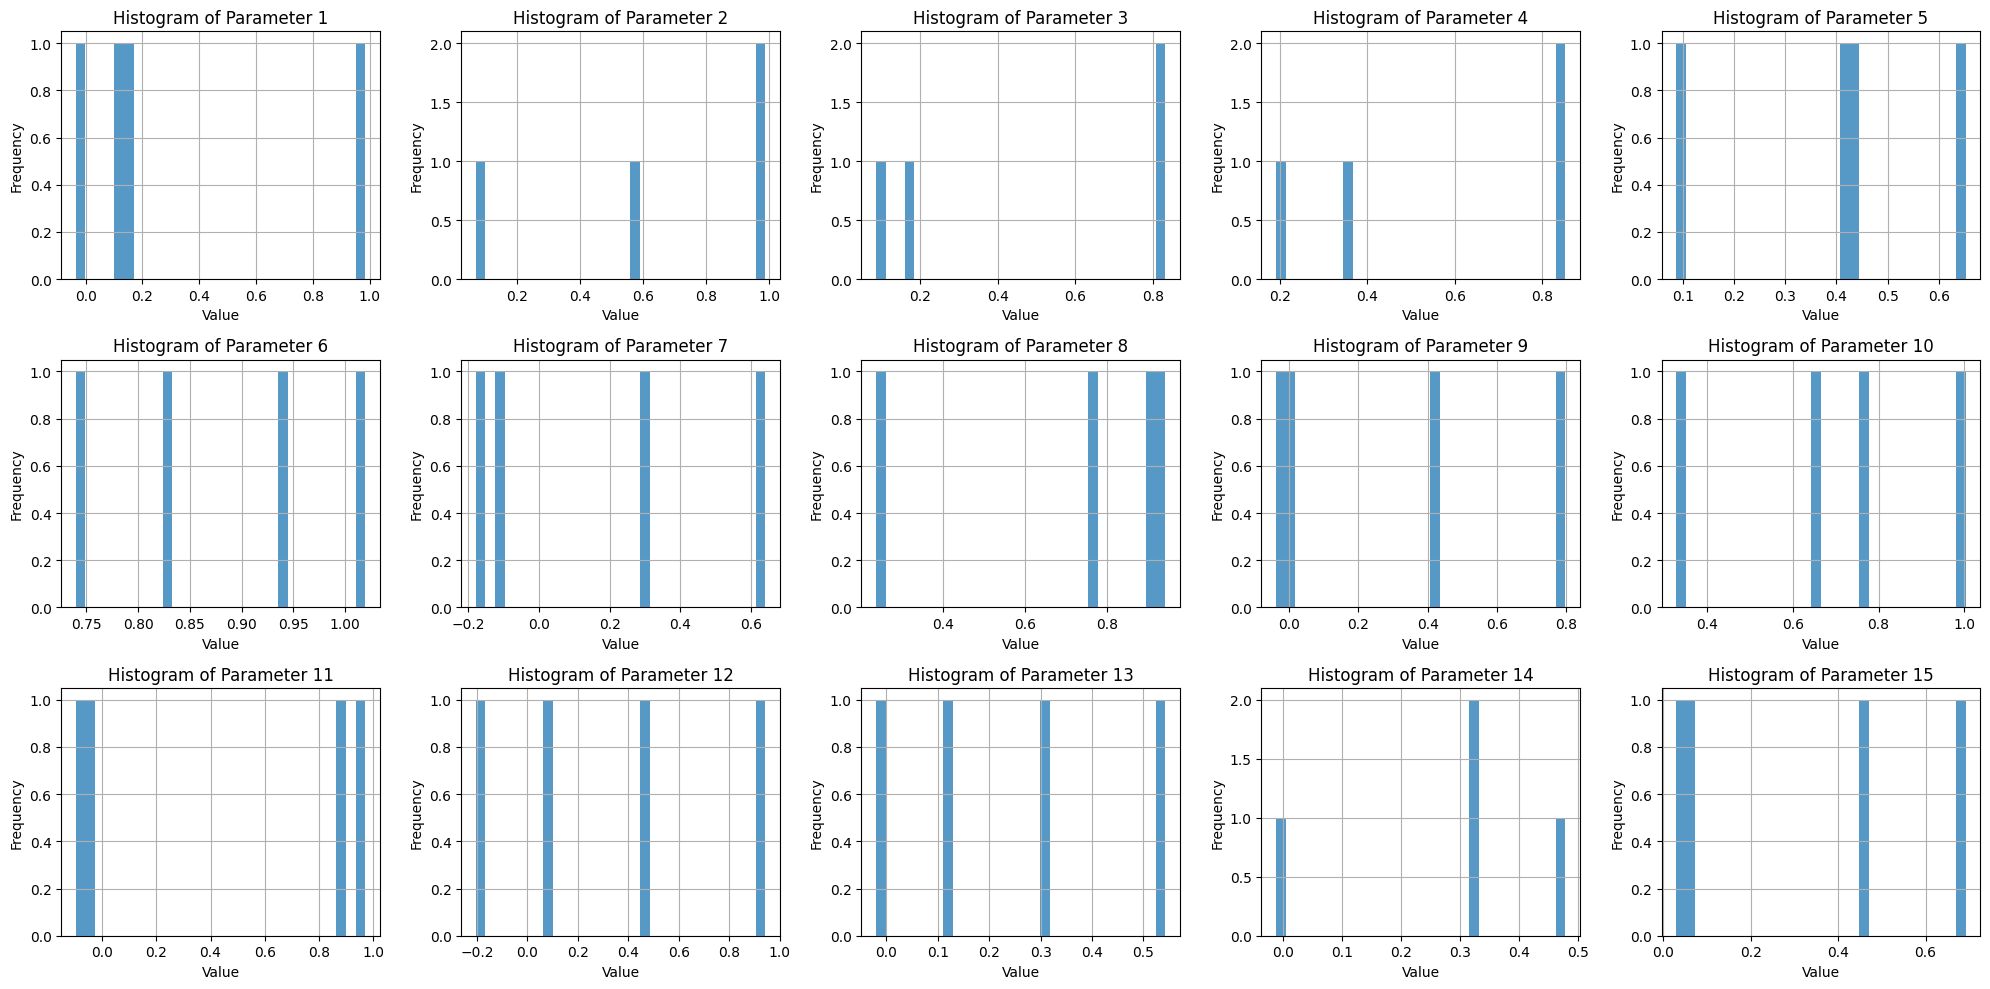

In [ ]:
villar.plot_observation(val_data_norm, num_samples =2)
villar.plot_prior(val_theta_norm)

# Define the CVAE Network

In [ ]:
# Instantiate the CNN_CVAE model
input_dim = 15  # Example input dimension
latent_dim = 200  # Example latent space dimension
conditional_dim = 3  # Based on Nx3x200 conditional input
encoder_hidden_dims = [512,512]  # Example hidden dimensions for the encoder
sequence_length = 200  # Length of sequences in the conditional input
conv_output_channels = [64, 32]  # Channels in each Conv1D layer for the decoder
kernel_sizes = [3, 3]  # Kernel sizes for the Conv1D layers in the decoder
output_channels = 3  # Matching the original conditional input's channels



network = CNN_CVAE(
    input_dim=input_dim,
    latent_dim=latent_dim,
    conditional_dim=conditional_dim,
    encoder_hidden_dims=encoder_hidden_dims,
    decoder_hidden_dims=[],  # Assuming this is not used in the provided structure
    sequence_length=sequence_length,
    conv_output_channels=conv_output_channels,
    kernel_sizes=kernel_sizes,
    activation_fn= nn.LeakyReLU(0.1),
    w_recon=1.0,
    w_misfit=1.0,
    kld=1.0
)

optimizer = optim.AdamW(network.parameters(), lr=1e-3)

# train_dataset = TensorDataset(train_data_norm, train_theta_norm)
# val_dataset = TensorDataset(val_data_norm, val_theta_norm)

# train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
# validation_loader = DataLoader(dataset=val_dataset, batch_size=128, shuffle=False)

print(network)

CNN_CVAE(
  (encoder): Encoder(
    (layers): Sequential(
      (0): Linear(in_features=15, out_features=512, bias=True)
      (1): LeakyReLU(negative_slope=0.1)
      (2): Linear(in_features=512, out_features=512, bias=True)
      (3): LeakyReLU(negative_slope=0.1)
    )
    (fc_mean): Linear(in_features=512, out_features=200, bias=True)
    (fc_logvar): Linear(in_features=512, out_features=200, bias=True)
  )
  (decoder): CNN_Decoder(
    (fc_expand): Linear(in_features=200, out_features=200, bias=True)
    (conv_layers): ModuleList(
      (0): Conv1d(4, 64, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): Conv1d(64, 32, kernel_size=(3,), stride=(1,), padding=(1,))
    )
    (output_layer_1): Linear(in_features=6400, out_features=15, bias=True)
    (output_layer_2): Conv1d(32, 3, kernel_size=(1,), stride=(1,))
  )
)


In [ ]:
network.train_model(train_loader=train_loader,
                    validation_loader= validation_loader,
                    optimizer=optimizer,
                    epochs=20,
                    num_cycles = 1,
                    theta_normalizer=theta_normalizer,
                    data_normalizer=data_normalizer,
                    
                    patience=100)

NameError: name 'train_loader' is not defined

In [ ]:
network.plot_loss()

# Inference

In [ ]:
post = network.get_posterior(observed_data= observed_data, num_samples=10000)
post = theta_normalizer.inverse_transform(post)


In [ ]:
#gk_dist.plot_posterior(post)

In [ ]:
gk_dist.posterior_hist(post)